# CNN with Keras by bgo - First Try

[Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python)의 가이드라인 대로 케라스를 사용하여 CNN 분류기를 학습시켜볼 것이다.

우리의 전력은 학습 데이터 12000개 중 20%를 검증 데이터로 사용하여 분류기를 최적화시키는 것이다. 테스트 데이터는 그대로 놔두고 정말 마지막에 모델의 정확도를 평가할 때 사용한다.

## 1. Generate dataset

In [1]:
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# 데이터 로드
data_train = pd.read_csv('../data/fashion-mnist_train.csv')
data_test = pd.read_csv('../data/fashion-mnist_test.csv')

In [3]:
# 입력 이미지 크기
img_rows, img_cols = 28, 28    
input_shape = (img_rows, img_cols, 1)

# numpy 배열로 변환
X = np.array(data_train.iloc[:, 1:])
y = to_categorical(np.array(data_train.iloc[:, 0]))

In [4]:
# 학습/검증 데이터셋으로 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

In [5]:
# 테스트 데이터도 numpy배열로 변환
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))

In [6]:
# 1차원 데이터를 2차원 이미지 데이터로 변환
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

# 0-1 값으로 정규화
X_train = X_train.astype('float32'); X_train /= 255;
X_test = X_test.astype('float32'); X_test /= 255;
X_val = X_val.astype('float32'); X_val /= 255;

## 2. Modeling

In [7]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [9]:
model = Sequential()

###################### 모델 설계 ######################
# Conv Layer 1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
                 kernel_initializer='he_normal', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Conv Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Conv Layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))

# 데이터 평탄화
model.add(Flatten())

# Dense Layer 1
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

# Dense Layer 2
model.add(Dense(num_classes, activation='softmax'))
#########################################################

# 모델 컴파일
# 1. 최적화 알고리즘 : Adam
# 2. 비용 함수 : 카테고리형 Cross Entropy
# 3. 평가 지표 : 정확도
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         7

## 3. Training

In [8]:
batch_size = 256    # 배치 크기
num_classes = 10    # 분류할 클래스 개수
epochs = 50         # epoch

In [11]:
# 모델 학습
history = model.fit(X_train, y_train,
                   batch_size=batch_size, epochs=epochs,
                   verbose=1, validation_data=(X_val, y_val))

# 모델 성능 평가
score = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/50
188/188 [==============================] - 12s 63ms/step - loss: 0.8737 - accuracy: 0.6737 - val_loss: 0.5346 - val_accuracy: 0.8061
Epoch 2/50
188/188 [==============================] - 12s 63ms/step - loss: 0.5343 - accuracy: 0.8013 - val_loss: 0.4285 - val_accuracy: 0.8447
Epoch 3/50
188/188 [==============================] - 13s 67ms/step - loss: 0.4555 - accuracy: 0.8336 - val_loss: 0.3829 - val_accuracy: 0.8555
Epoch 4/50
188/188 [==============================] - 13s 68ms/step - loss: 0.4114 - accuracy: 0.8506 - val_loss: 0.3554 - val_accuracy: 0.8688
Epoch 5/50
188/188 [==============================] - 13s 69ms/step - loss: 0.3855 - accuracy: 0.8592 - val_loss: 0.3240 - val_accuracy: 0.8791
Epoch 6/50
188/188 [==============================] - 13s 67ms/step - loss: 0.3546 - accuracy: 0.8708 - val_loss: 0.3089 - val_accuracy: 0.8893
Epoch 7/50
188/188 [==============================] - 13s 67ms/step - loss: 0.3410 - accuracy: 0.8759 - val_loss: 0.2948 - val_accuracy:

In [12]:
print('test loss :', score[0])
print('test accuracy :', score[1])

test loss : 0.20803546905517578
test accuracy : 0.9257000088691711


## 4. Results
### 4.1. Plotting accuracy and loss

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
history

In [19]:
# 정확도
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# 손실함수 값
loss = history.history['loss']
val_loss = history.history['val_loss']

# epoch 수
epochs = range(len(accuracy))

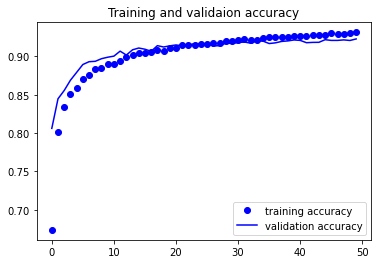

In [20]:
# epoch에 따른 정확도의 변화 시각화
plt.plot(epochs, accuracy, 'bo', label='training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='validation accuracy')
plt.title('Training and validaion accuracy')
plt.legend()
plt.show()

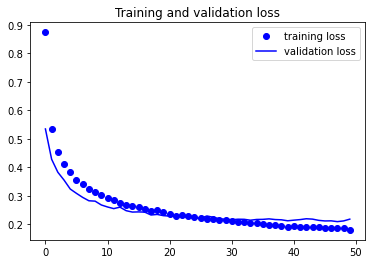

In [21]:
# epoch에 따른 손실함수 값의 변화 시각화
plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### 4.2. Classification Report

In [56]:
# 테스트 데이터 라벨 예측
predicted_classes = model.predict_classes(X_test)

# 시각화할 인덱스 추출
y_true = data_test.iloc[:, 0]
corrects = np.where(predicted_classes==y_true)[0]
incorrects = np.where(predicted_classes!=y_true)[0]

In [57]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.87      0.89      0.87      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.91      0.87      0.89      1000
     Class 3       0.92      0.95      0.93      1000
     Class 4       0.88      0.90      0.89      1000
     Class 5       0.99      0.98      0.98      1000
     Class 6       0.79      0.76      0.78      1000
     Class 7       0.96      0.96      0.96      1000
     Class 8       0.99      0.99      0.99      1000
     Class 9       0.96      0.98      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



우리의 분류기가 Class 6에 대해 정밀도와 recall이 떨어지는 것이 분명하다. Class 2의 경우 정밀도가 다소 떨어지는 편이지만 Class 4의 경우는 recall이 다소 떨어진다.

아마도 우리는 정확한 예측과 부정확한 예측을 시각화한 후에 더 많은 통찰력을 얻을 수 있을 것이다.

다음은 정확히 예측된 클래스들의 부분집합이다.

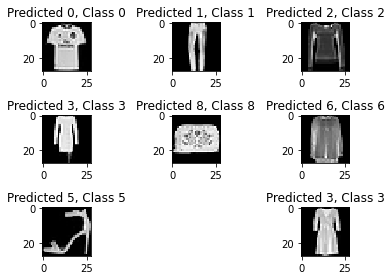

In [58]:
for i, correct in enumerate(corrects[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[correct].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title('Predicted {}, Class {}'.format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

다음은 부정확하게 예측된 클래스들의 부분집합이다.

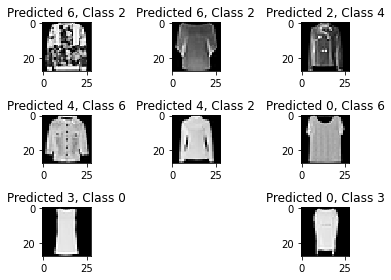

In [61]:
for i, incorrect in enumerate(incorrects[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[incorrect].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title('Predicted {}, Class {}'.format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()

CNN이 강력한 구조임에도 불구하고 여러 클래스에 존재하는 유사 패턴의 다양성이 분류기의 성능에 영향을 미치는 것으로 보인다. 재킷, 셔츠, 긴팔 블라우스는 다음과 같은 비슷한 패턴을 가지고 있다: 긴 소매(아니거나), 단추(없거나) 그리고 등등

### 4.3. What activations look like
활성화 값을 시각화해보자.

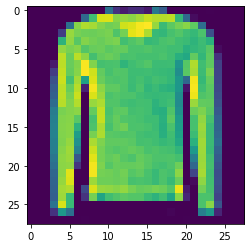

In [63]:
test_im = X_train[154]
plt.imshow(test_im.reshape(28, 28), cmap='viridis', interpolation='none')
plt.show()

첫 번째 레이어의 두 번째 채널의 활성화 값을 살펴보자.

In [66]:
from tensorflow.keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activation_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)         

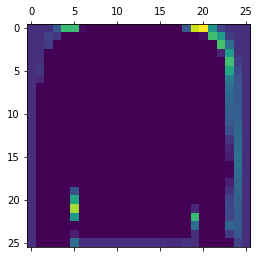

In [68]:
activations = activation_model.predict(test_im.reshape(1, 28, 28, 1))
first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

다른 conv layer의 활성화 값을 시각화해보자.

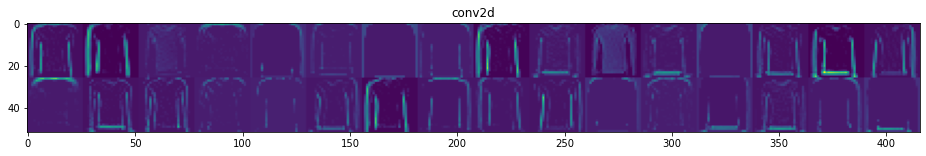

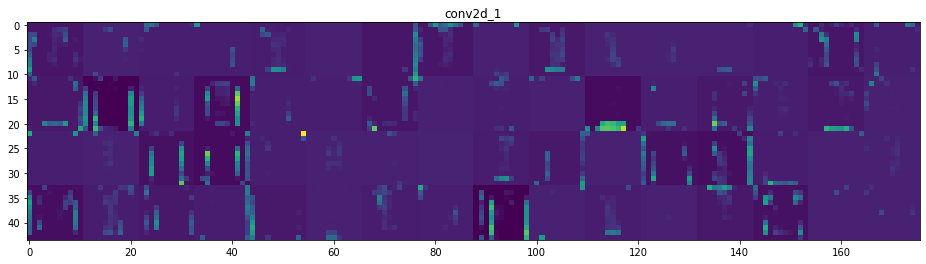

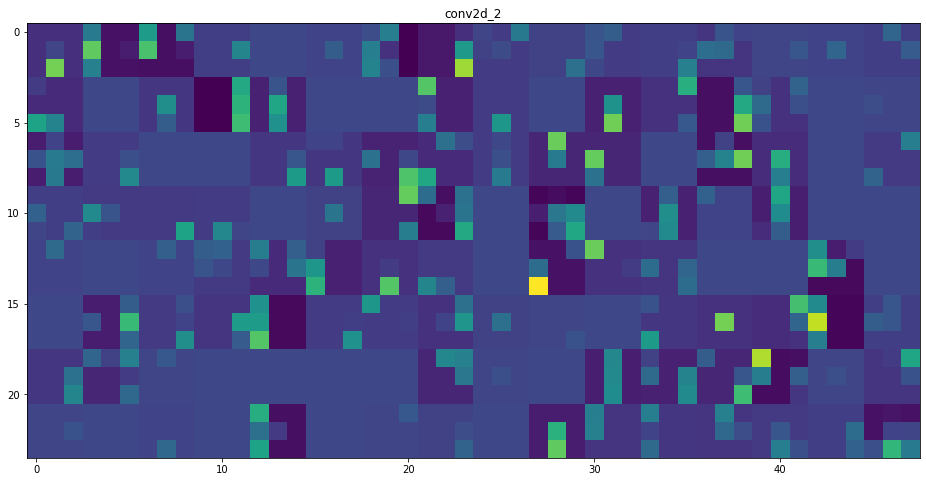

In [70]:
layer_names = []

for layer in model.layers[:-1]:
    layer_names.append(layer.name)

images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('conv'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size*n_cols, images_per_row*size))
    
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0, :, :, col*images_per_row+row]
                channel_image -= channel_image.mean()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                
                display_grid[col*size: (col+1)*size, row*size: (row+1)*size] = channel_image
                
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')